<a href="https://colab.research.google.com/github/FedeleDelvecchio/MLPNS/blob/main/Class/Lez11_07042021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Continuiamo con la lezione di ieri sul clustering, come unsupervised learning technique. Tecnica di ML per imparare la strutta dei dati per vedere se ci sono dei raggrupapmenti naturali nei dati, dopo aver definito la distanza. La distanza infatti ci dice qunto sono simili i dati. 

Possiamo vedere se ci sono dei raggruppamenti nel nostro data-sapce trmaite la distanza. 

Un problema è come definire una distanza in maniera utile, possiamo definire la distanza in modi diversi. 

E l'altro problema è come ottenere un algoritmo efficiente. 

**Oggi vediamo come costruire distanza categorica, per raggruppare i dati.

Vedremo 3 algoritmi per il clustering e le loro proprietà ed esempio come scegliere gli hyperparameters per uno specifico algoritmo (e.g. in quanti gruppi raccogliere i dati per confermare l'esistenza di un raggruppamento, oppure in altri casi possiamo sapere altre info per scegliere altri algoritmi). 


**Concetto di CLUSTERING**: osserviamo le variabili e vediamo se si posso raggruppare. In quanti gruppi, con quali estensioni, qual è il centro di questi gruppi, l'estenione, ...

Abbiamo diversi modi di raggruppare gli elementi in base a quello che vogliamo fare (quanti gruppi, gruppi piccoli o con un certo numero di elementi). 

Vogliamo creare gruppi con due criteri: criteri interi ed esterni.

- **Criterio interno**: vogliamo che i gruppi siano compatti, cioè maximally similar (intra cluster compactness).

- **Criterio esterno**: vogliamo che i gruppi siano dissimilari tra loro ("similarità matematica = 1 - dist"): massima dissimilarità.

Siccome possiamo dividere i gruppi in modi diversi, dobbiamo definire il concetto di distanza per sapere come sono distanti gli oggetti.

Nella distanza di minkowsi non è "1/p radice" ma è "p radice". LA PROF DEVE CORREGGERE LE SLIDE.
Se nella distanza di minkowski p=1 abbiamo la Manhattan distance. Se p=2 abbiamo la distanza euclidea (crssfly distance). Se non siamo su un piano possiamo definire delle distanze su spazi curvi. 

In [3]:
import scipy as sp
import numpy as np
from scipy import spatial

**Il pacchetto delle distanze è il seguente**

In [ ]:
from scipy.spatial import distance

In [ ]:
distance #è un modulo

<module 'scipy.spatial.distance' from '/usr/local/lib/python3.7/dist-packages/scipy/spatial/distance.py'>

In [ ]:
distance.minkowski?

"distance" ha un sacco di attributi. Esempio:

In [ ]:
np.random.seed(732)
u = np.random.randn(100).reshape(10,10)

In [ ]:
v = np.random.randn(100).reshape(10,10)
v.shape

(10, 10)

In [ ]:
distance.minkowski(u[0],v[0], p=2)

5.304292625453567

Adesso abbiamo fatto una distanza tra 1D vectors. Per fare distanze tra oggetti che hanno n features e m observations, posso fare come segue: ritorna la lower triangular matrix della distance matrix. Fa la distanza tra il punto 1 e il 2, tra il 2 e il 3, per ogni elemento di matrice. Per efficienza computazionale mi ritorna solo la lower triangular.

Pdist calcola la distanza solo una volta.


In [ ]:
distance.pdist(u).shape

(45,)

Se voglio tutta la matrice di distanza, anzichè la lower triangular, devo fare:

In [ ]:
distance.squareform(distance.pdist(u))

array([[0.        , 5.54210499, 3.14804721, 4.17132557, 5.55563523,
        3.79933242, 5.15027796, 4.92321317, 4.66539798, 4.94714787],
       [5.54210499, 0.        , 4.34821295, 4.69916698, 4.82404252,
        6.73217672, 6.32669836, 3.83640446, 5.66620501, 5.54537269],
       [3.14804721, 4.34821295, 0.        , 3.91957975, 4.75444007,
        4.69989611, 4.2969978 , 3.62938772, 4.93561614, 5.15199722],
       [4.17132557, 4.69916698, 3.91957975, 0.        , 4.81308291,
        5.71941341, 5.10938772, 4.12864403, 3.46511702, 3.91436118],
       [5.55563523, 4.82404252, 4.75444007, 4.81308291, 0.        ,
        6.05136259, 3.99562521, 3.16313168, 4.70566425, 4.94804545],
       [3.79933242, 6.73217672, 4.69989611, 5.71941341, 6.05136259,
        0.        , 4.23526429, 6.66150391, 5.19743169, 5.77952517],
       [5.15027796, 6.32669836, 4.2969978 , 5.10938772, 3.99562521,
        4.23526429, 0.        , 5.13630455, 3.74353885, 5.42192383],
       [4.92321317, 3.83640446, 3.6293877

In [ ]:
distance.squareform(distance.pdist(u)).shape

(10, 10)

In [ ]:
import pylab as pl

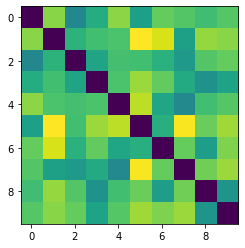

In [ ]:
pl.imshow(distance.squareform(distance.pdist(u)))

# Come costruiamo distanze tra variabili cateogriche (Jaccard matrix)

Se ho delle variabili categoriche, il concetto di distanza si complica. 

**In generale pensiamo alle categorie come proprietà delle osservazioni.** Per costruire una distanza con questi oggetti è trattare solo con variabili binarie. 

Se ho ad esempio una categoria colore con 5 possibilità di colori, la posso trasformare in 5 variabili binarie: oggetto è o non è di quel colore. (One Hot Encoding)

Costruiamo una contingency table for a categorical varibale con le osservazioni sugli assi). I numeri M11, M10, ... rappresentano quante di queste variabili binarie sono positive per l'una o per l'altra osservazione. 

Su qeusta base posso costruire diverse distanze. Jaccard matrix è la somma degli M per cui tutti gli elementi sono positivi, diviso per tutti gli altri elementi.

###Misuriamo la distanza tra i 5 boroughs of NY

**5 quartieri. Misuriamo la distanza basata sulla presenza di risorse e servizi per le donne.** 

Ciascuna delle organizzazioni è una variabile, e la presenza o no di una organizzazione in un quartiere è quello che metto nella contingency table. (https://github.com/fedhere/MLPNS2021/blob/main/HW4_clustering/Distance_Women_services.ipynb)



**.values trasforma una series in un np array**

In [14]:
from google.colab import drive

In [15]:
drive.mount("/content/drive")

Mounted at /content/drive


In [16]:
ls

drive/  sample_data/


In [17]:
cd drive/

/content/drive


In [18]:
cd MyDrive/MLPNS

/content/drive/MyDrive/MLPNS


In [19]:
ls

 bootcampNB.ipynb
 busBusses.npy
 busTimeTable.npy
 CEDIT_6_5_Friuli_Italy_1976.cpg
 CEDIT_6_5_Friuli_Italy_1976.dbf
 CEDIT_6_5_Friuli_Italy_1976.prj
 CEDIT_6_5_Friuli_Italy_1976.sbn
 CEDIT_6_5_Friuli_Italy_1976.sbx
 CEDIT_6_5_Friuli_Italy_1976.shp
 CEDIT_6_5_Friuli_Italy_1976.shp.xml
 CEDIT_6_5_Friuli_Italy_1976.shx
'CEDIT_6_5_Friuli_Italy_1976.zip?raw=true'
 country_pop.xls
 demo1.py
 demo2.py
 demo3.py
 e68ceb0a193e4e378b29255b62ab75e0_0.geojson
 flatiron_building_new_york_city-111.jpg
 grb050525A.csv
 healthcare-dataset-stroke-data.csv
 inclassNB2016.ipynb
 inclassNB2017.ipynb
 inclassNB2018.ipynb
 ispalindrome.cpython-37.pyc
 ispalindrome.py
 kaggleHiggs/
 kalbar_drone_190113-768x512.jpg
 LoopExercise.ipynb
 LoopExerciseSolution.ipynb
 Mona_Lisa.png
 NYCskyline.jpg
 NYC_Women_s_Resource_Network_Database.csv
 PandasDataWrangling-Chap7.ipynb
 playwPandas.ipynb
 printGoodmorningGoodAfternoon_instructions.py
 printGoodmorningGoodAfternoon.py
 pyboot2020_2.ipynb
 pyboot2020.ipynb
 pyBo

Siccome è diffice definire una distanza tra due animali costruiamo distanze categoriche binarie.

**Simple metric è la somma degli elementi della diagonale, diviso tutti gli altri.**

La **simple metric** è il numero di servizi che esistono in entrambi i posti diviso per tutte le altre celle: co-occurences / all.

Ottengo una distanza direttamente interpretabile perchè è normalizzata: se i due boroughs fossero identici i numeri sarebbero sulla diagonale. (ricordiamo che distance = 1 - similarity).

Se la distanza è zero, i borougs sono uguali e la similarità è 1.


Abbiamo 2 problemi per cui il One Hot encodin è problematico:

1. Se avessi 22 categorie, da 1 variabile, avrei ho 22 categorical variables. Quindi difficile definire distanze.

2. Le altre varibili che ho creato sono correlate, e in ML i modelli assumono che le variabili non siano correlate.

# **Whitening and pre-processing**

Preprocessing is all the things I do to my data before passing it to an algorithm. 

**There is a key step of pre-process: are algorithms assume that there is no covariance between the data? Typically there is covariance between the data** 

If I wanna use some data I have to know if they are correlated or not.

###**CORRELATION DOES NOT IMPLY CAUSATION**

Posso trovare delle correlazioni che non hanno senso perchè una non può causare un'altra. Questa è la differenza tra correlazione e causa.

###**By whitening I mean to remove the correlation between point, before passing this data to an algorithm that assume  not correlated data.** This could be done assuming covariance matrix is invertible and can be operated by linear algebra. All I want to do is diagonalize the matrix and setting all the off diagonal terms to zero!



Algorithm are assuming that the data I pass are not correlated. Pearson's correlation coefficient is another way to recognize correlation: **covariance = correlation/variance**. 

This coefficient has some issue, it might not see some mathematical correlation that is not linear.  

**Be carefull: data seems not be correlated but there might be codipendence between data, they can be associated by a messed formula (for example, some mathematical relation)**

Most of algorithm, still assume that data all completely not correlated. 



Generally we don't do it, at the very least we have to rescale the data: take my linearly correlated data and squish it into a ball centered on 0. 

##**STANDARDIZE THE DATA: subtracting the mean and divide by standard deviation on each axis.**

###There is the preprocessing package to do this for me. sklearn.scale(X, axis=0).

In most image processing applcation(e.g. segmentation), there is another scaling process: scale by minmax.

**For clustering, NN, deep learning.. i need to do a minmax process**: dividing by the max and subtract the minimum. **If they are not image I rescale with scale as preprocess.scale so standardaze it.**

#K-MEANS

For example K-means can allow me to extract cluster of vegetation from one photo, see below.

###HOW CLUSTERING WORKS

We have 3 family of clustering: partitioning, hierarchical, density based. 

**PARTITIONAL CLUSTERING**: Hard or Soft. We talk about Hard clustering, but not about soft: k-means clustering.

**k-means clustering**: this is not detrministic. It depends on the seed chosen at the beginning. This is the most common method.

K-means:

1. Choose N centers guesses. Look at the data and see how center chould be, or make assesments based on my knowledge. 

2. Calculate the distance between each point and each center, and assign each point to the closest center.

3. Claculate the new center.  

Now I have cluster assignemnt, so I can say waht is the center of the cluster. But now the center has moved, so object can now belong to another cluster. 

So I repeat all the steps 2 and 3 untill convergence: i.e. cluster no longer change. 


L'obbiettivo per K-means è minimizzare la distanza aggregata tra i cluster (it's intnernal criterion). Questa rappresentaerebbe la **target function** per il K-means. 

The efficiency of this algorithm grows linearly as the dimensions, clusters, datapoints. So this is great!

###**BUT**
**it is not deterministic because of the starting choice of the N center guesses.**
Also I have to declare the number of clusters, and I may not know how many cluster choose. 

I have also to define the mean, and I don't know what is the mean between categorical variable $\rightarrow$ it is complex, so it only works if data is entirely numerical. 

An alternative to this is the K-median, insted of K-means. 

###**ELBOW METHOD**

There is a way to make the algorithm gives the best nimber of cluster: run for more number of clusters and see how the criteria is optimized. 
I can't look for the mininum, because it's obvious that if I choose an higer number of lcuster I will get a better results. But in this case, insted of watching the minimum as in AIC and BIc, I can look to the change of slope of the intercluster compactness vs number of cluster plot.


##HYPERPARAMETERS

The hyperparameter determine strongly the outcome, so is important to talk about them. 

- Number of clusters
- choose the initial guess for the center. I can use random.
- To overcome the fact that the result is not deterministic based on the initial choice, I can use n_init that will run the methods more than once to see what is the variance of the results. $\rightarrow$ cost of computational efficency.
- tollerance of convergence: tol
- max number of iterations
- random_state to specify the seed to comply the reproducibility


#EXERCISE

Segment an image using K-means clustering and look at what fraction of image is vegetation.  

https://github.com/fedhere/MLPNS2021/blob/main/HW4_clustering/imagesegwKM_forest.ipynb

In [23]:
# your basic imports
from __future__ import print_function
import os
import sys
import numpy as np
import pylab as pl
pl.rcParams['font.size'] = 20
import scipy.ndimage as nd
import skimage.io as io #read in an image with this package is CONVENIENT

In [24]:
op = io.imread("kalbar_drone_190113-768x512.jpg")

**io.imread read in an image and turn it into numpy array**

In [28]:
type(op)

numpy.ndarray

In [29]:
op.shape

(512, 768, 3)

In [32]:
op

array([[[ 27,  85,  26],
        [ 63, 104,  48],
        [108, 139,  80],
        ...,
        [157, 137, 126],
        [171, 158, 142],
        [158, 149, 132]],

       [[ 27,  77,  39],
        [ 39,  75,  37],
        [ 68,  96,  55],
        ...,
        [163, 140, 126],
        [174, 159, 140],
        [160, 149, 127]],

       [[  2,  43,  27],
        [  3,  34,  16],
        [ 27,  51,  27],
        ...,
        [159, 133, 116],
        [166, 148, 126],
        [160, 145, 122]],

       ...,

       [[118, 160,  58],
        [114, 159,  56],
        [126, 174,  65],
        ...,
        [138, 170, 107],
        [ 84, 114,  50],
        [ 59,  88,  24]],

       [[162, 205,  87],
        [143, 187,  72],
        [119, 168,  51],
        ...,
        [107, 144,  74],
        [110, 145,  81],
        [ 78, 109,  50]],

       [[155, 197,  89],
        [139, 182,  77],
        [125, 172,  68],
        ...,
        [ 70, 108,  51],
        [ 83, 114,  70],
        [ 68,  95,  60]]

Use pylab to show the image

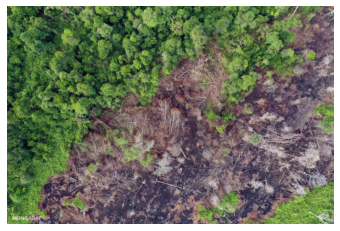

In [33]:
pl.imshow(op)
pl.axis('off');

In [34]:
from sklearn.cluster import KMeans

Can I create cluster around a specific value of color in image space, such that one of those cluster is collecting all of the green pixel, for example?

If I can do this, I can calculate the fraction of vegetation in my image. 

###Before using the algorithm I have always have to scale the data in some way. **NOTE THAT** KMeans works only with euclidian distance!!

**This distance that takes the difference between values on one axes, sqaures it and sum of all axis, and takes the sqrt of the sum.
That means if I have different variance on one axis then another, that axis will dominate in my distance matrix. If the data are not standardized, one axis will not count because is more compact than the other, because it is more compact by definition: it has a smaller variance.**

All the variable will count equally, so I have to standardize the data.




I will scale with minmax because it is an image.

In [38]:
from sklearn import preprocessing

In [39]:
Xopscaled = preprocessing.minmax_scale(op.reshape(op.shape[1] * op.shape[0], 3).astype(float), axis=1)


I want to scale along the axis 1, because I want each pixel (R G and B) to be scaled between 0 and 1. I don't want all of the pixel to be scaled in each channel individually. the dominant color channel will be 1, the minimum relevant color channel will be 0. 

If I don't do preprocessing I am implicitly saying to my code to take count only of a variable with the larger covariance.

I also am scaling by the axis 1.
Always transform uint inot float before doing math, otheriwise it will be a mess with number after 256.

n_sample is n_observation.

n_feature is the variable. 

**My featureas are Red Green and Blue. My observation are all the pixels in the image.**

An image is 3D: number of rows, number of clumns, and number of variable.
But minmax scale want as input a bunch of observations. So I have to reshape the image, and line up all the pixels, and passing it as a single array as Ncolumn x Nrows. So insted of being: N_rows, N_columns, 3, now is N_rows*N_columns, 3. 

Since I standardize between 0 and 1, I need also to convert inot float numbers.

In [40]:
Xopscaled.reshape(op.shape)[200, 700]

array([0.38888889, 0.        , 1.        ])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


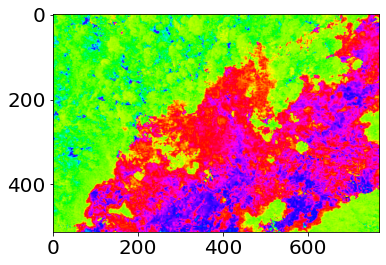

In [41]:
pl.imshow(Xopscaled.reshape(op.shape));

I set 4 cluster: the prevalent color of my image: green, black, brown, white.

In [42]:
ncluster = 4

I am doung to command in one: create the model with hyperparameter and fit it the object ot the data scaled.

In [44]:
kmop = KMeans(n_clusters=ncluster, random_state=302).fit(Xopscaled)

print the cluster center

In [46]:
kmop  #k-means object

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=302, tol=0.0001, verbose=0)

In [49]:
kmop.cluster_centers_   #centers of the clusters R G and B for every of the 4 clusters.

array([[ 1.12466749e-01,  9.95313228e-01,  1.36237582e-01],
       [ 1.00000000e+00,  9.04999817e-02,  1.87731617e-01],
       [ 6.73565977e-01,  1.41564980e-02,  9.43149870e-01],
       [ 5.84431362e-01,  9.83308419e-01, -4.97046848e-13]])

**Per il primo cluster, prima riga, ha trovato che è quasi tutto verde infatti abbiamo quasi 1 per il green e G e B sono quasi 1 ordine di grandezza più piccoli. 
Per il secondo cluster ha trovato un sacco di rosso.
Il terzo è un mix tra red and blu con un po' più di blu. E l'ultimo doveva essere bianco, ma è un mix tra red e green e il blu e molto piccolo.**

In [54]:
#I can improve my code saying what are my color deifnition;
#                      Red      Green    Blue    White
#mycenters = np.array([[1,0,0], [0,1,0], [0,0,1], [1,1,1]])

In [57]:
mycenters = np.array([[1,0,0], [0,1,0], [0,0,1], [1,1,1]])

In [58]:
kmop = KMeans(n_clusters=ncluster, init=mycenters, random_state=302).fit(Xopscaled)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  """Entry point for launching an IPython kernel.


In [59]:
kmop.cluster_centers_

array([[ 1.00000000e+00,  9.02788223e-02,  1.87811461e-01],
       [ 1.21798448e-01,  9.95538363e-01,  1.30458774e-01],
       [ 6.73509773e-01,  1.42109451e-02,  9.43154614e-01],
       [ 5.91540906e-01,  9.82696502e-01, -4.91495733e-13]])

In [65]:
kmop.labels_[:10]

array([1, 1, 3, 3, 1, 1, 1, 3, 3, 3], dtype=int32)

For every observations it tells for every pixel, which cluster it was assigned to. So, the first 2 pixel belong to cluster 1, the 3 and 4 belong to cluster 3, and so on. With this I am able to calculate the fraction of vegetation cluster.

So the new improved solution is:

In [62]:
from matplotlib import cm

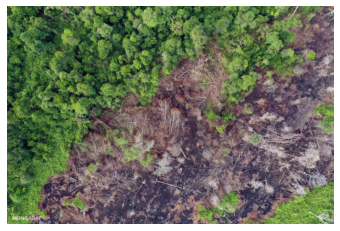

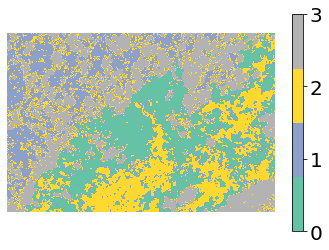

In [64]:
pl.imshow(op)
pl.axis('off');
pl.figure()
mycamp = cm.get_cmap('Set2', ncluster)
pl.imshow(kmop.labels_.reshape(op.shape[:2]), cmap=mycamp)
pl.axis('off')
pl.colorbar()

**Then I need to identify the cluster that is the vegetation cluster (for example in my image is the 3, but other vegetation got cputre by cluster 1).**

This is not simple problem. 

In [68]:
print("fraction of vegetation pixel {:.3f}".format((kmop.labels_ == 3).sum() * 1.0 /len(kmop.labels_)))

fraction of vegetation pixel 0.305


###Now I wanna look at the inertias (intra cluster compactness): what is the right numebr of clulsters, made with elbow mwehod. 

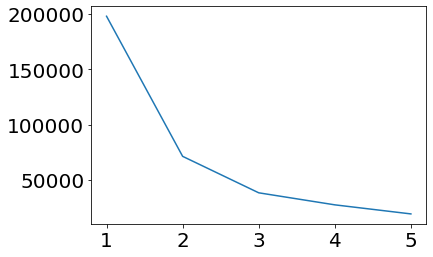

In [71]:
inertias = []
for i in range(1,6):
  kmop = KMeans(n_clusters=i, random_state=302).fit(Xopscaled)
  inertias.append(kmop.inertia_)

pl.plot(range(1, 6), inertias)

With this plot I cannot say that there is an elbow anywhere.. This time elbow method didn't worked.

Questo esercizio con la foto della foreesta bruciata andava fatta con 2 cluster. La trattazione fatta prima era per unaltra foto della prof. Ma tieni a mente il ragionamento. 

# Mixture models: Expectation Maximization

A quite similar method than K-Means. It do the same things assigning thing to center, but it does on porbabilistic ways. 

We have to define a probability distribution. 

We have 2 step:

1. expectation: which gaussian do we expect our point to come from

2. maximization: maximize the parameter of the gaussian to have produced the data that we have expectation that they came from that gaussian.


This is a soft type beacuse it is probabbilistic. 

It is non deterministic, like K-means.

# Hierarchical clustering

Different aproach from the previous method. 

We have not to decide what is the number of cluster. 

We need to define the distance between a point and group, or between two clusters.

#Agglomerative clustering (bottom up)

Assume observation are in cluster of 1. 

Produce a pairwise distance matrix, and group toghere the cluster that are closest to each other. 

This is a deterministic method, becausa unlike the k-means I don't need to initialize the center of clusters.

In sklearn i can pass the number of cluster to stop the method at a given number of clusters.


# Density Based

DBSCAN 

**Most used clustering method, because it enable the concept of density**.

I can define a number of neighbor to say that an object belong to a clusters. This means I can define an isolated object --> I can identify outliers and so anomalies. 

It works similar for partitionin method. 

We have also different hyperparameter such as the distance $\epsilon$ to say waht is the minimum distance to join point. 

It scale with $N^2$. And in this method there is not a way to see what are the best hyperparameters suhc as elbow methods ro run differently. 